In [802]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import matplotlib.ticker as mticker

In [803]:
# Spécifier le type de données pour les colonnes 25, 27 et 29
col_dtypes = {25: str, 27: str, 29: str}

# Lecture du fichier .csv et spécification des types de données
df = pd.read_csv('conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-commune.csv', sep=';', dtype=col_dtypes)

# Supprimer les lignes avec des valeurs NaN dans ces colonnes pour cause de data non exploitable
cols_to_check = df.columns[[25, 27, 29]]
df = df.dropna(subset=cols_to_check)

In [804]:
# Renommer plusieurs colonnes
df = df.rename(columns={
    'consoa': 'Consommation Agriculture (MWh)',
    'consoi': 'Consommation Industrie (MWh)',
    'consot': 'Consommation Tertiaire (MWh)',
    'consor': 'Consommation Résidentiel(MWh)',
    'consona': 'Consommation Secteur Inconnu(MWh)',
    'consototale': 'Consommation Totale (MWh)'
})

In [805]:
# Supprimer les colonnes inutiles
df = df.drop(['nombre_maille_secretisees_a', 'indquala', 'pdli', 
            'nombre_maille_secretisees_i', 'indquali', 'pdlt', 
            'nombre_maille_secretisees_t', 'indqualt', 'pdlr', 
            'nombre_maille_secretisees_r', 'indqualr', 'pdla', 
            'thermor', 'partr', 'pdlna', 'nombre_maille_secretisees_na', 
            'indqualna', 'code_commune', 'libelle_commune', 
            'code_epci', 'libelle_epci', 'libelle_departement',
            'libelle_region', 'id_filiere', 'code_postal', 'code_region', 'operateur'], axis=1)

In [806]:
# Supprimer les lignes où la colonne 'filiere' est égale à 'gaz'
df = df[df['filiere'] != 'Gaz'].copy()

In [807]:
# Liste des colonnes à sommer
cols_to_sum = ['Consommation Agriculture (MWh)', 'Consommation Industrie (MWh)', 
            'Consommation Tertiaire (MWh)', 'Consommation Résidentiel(MWh)', 
            'Consommation Secteur Inconnu(MWh)', 'Consommation Totale (MWh)']

# Liste des colonnes à regrouper
cols_to_group = ['annee', 'filiere', 'code_departement']

# Regrouper les données par les colonnes spécifiées, puis additionner les valeurs
df_grouped = df.groupby(cols_to_group)[cols_to_sum].sum().reset_index()

In [808]:
# Convertir la colonne 'code_departement' en string
df_grouped['code_departement'] = df_grouped['code_departement'].astype(str)

# Trier par departement croissant et par annee
df_sorted = df_grouped.sort_values(['annee', 'code_departement'])

In [809]:
# Rendre les chiffres plus lisibles
pd.set_option('display.float_format', '{:.2f}'.format)

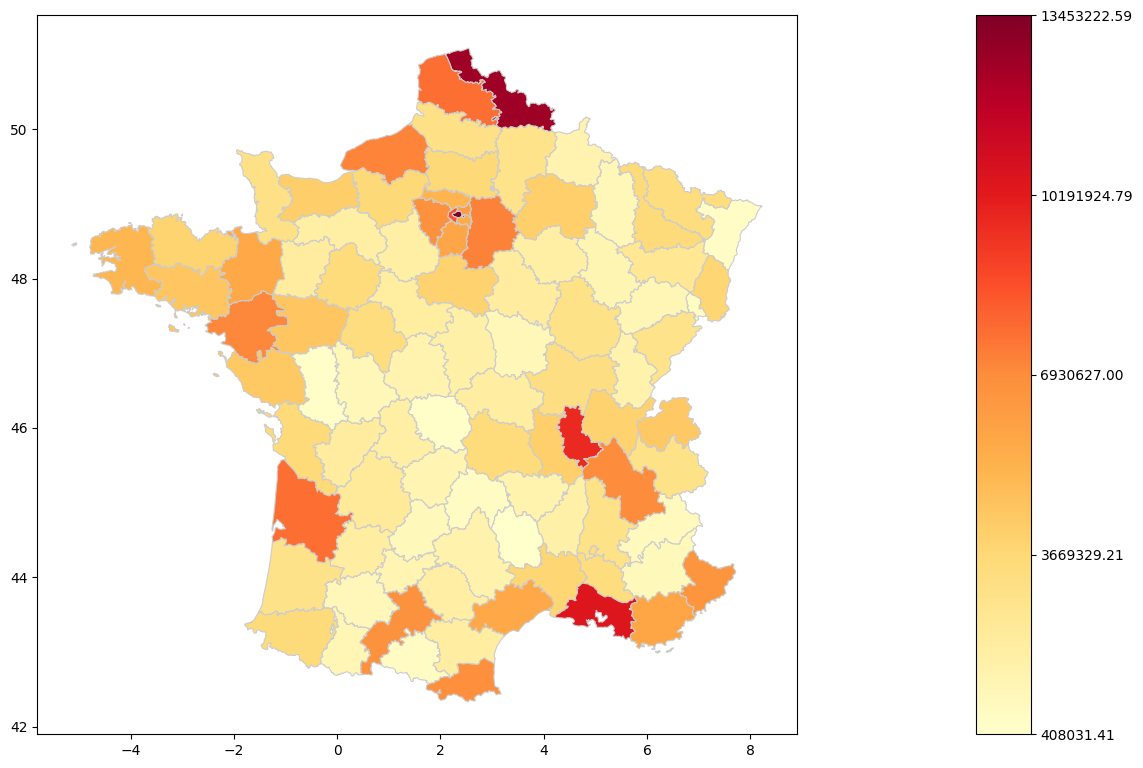

In [810]:
# # Charger le fichier GeoJSON des départements français
france = gpd.read_file('departements_francais.geojson')

# # Supposons que df est votre DataFrame existant et qu'il a une colonne 'code_departement'
# # qui correspond au 'code' dans le fichier GeoJSON
df_2011 = df_sorted[df_sorted['annee'] == 2011]

# # Fusionner le dataframe avec le fichier GeoJSON
merged = france.set_index('code').join(df_2011.set_index('code_departement'))

# Crée une nouvelle figure et un ensemble d'axes de sous-tracés
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Normalise les données de consommation totale pour qu'elles soient mappées à la gamme de couleurs
norm = Normalize(vmin=df_2011['Consommation Totale (MWh)'].min(), vmax=df_2011['Consommation Totale (MWh)'].max())

# Crée un objet ScalarMappable pour mapper les valeurs normalisées aux couleurs dans le jeu de couleurs 'YlOrRd'
cbar = cm.ScalarMappable(norm=norm, cmap='YlOrRd')

# Nécessaire pour utiliser cet objet ScalarMappable plus tard pour la barre de couleurs
cbar.set_array([])

# Trace le GeoDataFrame en utilisant la colonne 'Consommation Totale (MWh)' pour déterminer les couleurs
merged.plot(column='Consommation Totale (MWh)', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Créer une légende manuellement
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
colorbar = fig.colorbar(mappable=cbar, cax=cax)

# Définir les positions des graduations sur la légende
ticks = np.linspace(df_2011['Consommation Totale (MWh)'].min(), df_2011['Consommation Totale (MWh)'].max(), num=5)
colorbar.set_ticks(ticks)

# Formater les valeurs sur la légende
formatter = mticker.FuncFormatter(lambda x, pos: f'{x:.2f}')
colorbar.formatter = formatter
colorbar.update_ticks()

plt.show()

In [811]:
df_sorted.head(40)

,annee,filiere,code_departement,Consommation Agriculture (MWh),Consommation Industrie (MWh),Consommation Tertiaire (MWh),Consommation Résidentiel(MWh),Consommation Secteur Inconnu(MWh),Consommation Totale (MWh)
0,2011,Electricité,01,28496.17,1180989.65,737572.47,1977574.54,37947.56,3962580.39
1,2011,Electricité,02,26490.69,838010.71,515742.32,1472026.60,3010.34,2855280.66
2,2011,Electricité,03,25747.90,426364.02,430434.21,1130822.23,3822.28,2017190.64
3,2011,Electricité,04,13601.05,105074.61,250012.20,685956.96,713.21,1055358.03
4,2011,Electricité,05,6611.47,44404.66,323814.05,561238.84,1343.35,937412.37
5,2011,Electricité,06,5116.35,349797.93,2106112.95,4118587.18,13451.93,6593066.34
6,2011,Electricité,07,5209.86,403223.45,274104.16,1087970.74,500.77,1771008.98
7,2011,Electricité,08,6496.52,510119.99,232299.15,773083.38,84.85,1522083.89
8,2011,Electricité,09,3855.69,133490.40,142803.86,516555.39,5437.19,802142.53
9,2011,Electricité,10,33909.59,524680.83,374681.45,962384.81,1928.03,1897584.71
